In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import pickle
import os
from util_funcs import *
import matplotlib.pyplot as plt

In [2]:
# Setup Stuff

PATH = '.'
FINGERPRINTS = 'fingerprints'
fing_path = os.path.join(PATH, FINGERPRINTS)

morg_2048_path = 'morgan_df_2048.p'
morg_1024_path = 'morgan_df_1024.p'
maccs = 'maccs_df.p'

morg_2048_bit = os.path.join(fing_path, morg_2048_path)
morg_1024_bit = os.path.join(fing_path, morg_1024_path)
maccs = os.path.join(fing_path, maccs)

pd.options.display.max_rows = 14
pd.options.display.max_columns = 6

In [3]:
# First set
df = pickle.load(open(morg_2048_bit, 'rb'))

# Tuple to save space/make counting eaiser
df['Solubility'] = df['Solubility'].apply(tuple)
df['fingerprints'] = df['fingerprints'].apply(tuple)

# This is where I did a bunch of tanimoto calcs on everything before I accidently overrode my file,
# which wasn't very informative anyways, moving on
df

,SMILES,Solubility,fingerprints
0,O=C([C@H](CC1=CC=CC=C1)N1C(=O)C2=CC=CC=C2C1=O)...,"(0, 1)","(0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CC1=C(C)CC2C(C1)C(=O)N(C2=O)C1=CC=CC(O)=C1,"(0, 1)","(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CC1=C(C)CC2C(C1)C(=O)N(C2=O)C1=CC=C(I)C=C1,"(0, 1)","(0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CCCCN1C(=O)NC2=C(CCC2)C1=O,"(0, 1)","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CC1=NC2=C(S1)C=CC1=C2C=CC2=C1N=C(C)S2,"(1, 0)","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,CC(C)OC(=O)NC1=CC=C(Br)C=C1,"(0, 1)","(0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,O=C(NC1=CC=CC=C1)OC1CCCCC1,"(0, 1)","(0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
50613,COC1=CC=CC(C=CC(=O)C2=CC=CC(=C2)C#N)=C1OC,"(0, 1)","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
50614,CC(=O)N1CCC2=CC(=CC=C12)C(=O)NC1CCOC2=CC=CC=C12,"(0, 1)","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [4]:
active_bits_sol= [0 for i in range(2048)]
active_bits_insol= [0 for i in range(2048)]

# soluble active bits
for c, item in enumerate(df['fingerprints']):
    if df['Solubility'][c] == (0,1):
        active_bits = [index for index, bit in enumerate(item) if bit == 1]
        for item in active_bits: active_bits_sol[item] +=1

#insoluble active bits
for c, item in enumerate(df['fingerprints']):
    if df['Solubility'][c] == (1,0):
        active_bits = [index for index, bit in enumerate(item) if bit == 1]
        for item in active_bits: active_bits_insol[item] +=1


In [5]:
df_sol = pd.DataFrame(data = active_bits_sol, columns = ['Soluble Bits'])
df_insol = pd.DataFrame(data = active_bits_insol, columns = ['Insoluble Bits'])


# Normalize and remove negitive values to make it eaiser to see patterns
df_sol_norm = df_sol.apply(zscore)
df_insol_norm = df_insol.apply(zscore)
df_sol_norm = df_sol.apply(zscore) + abs(min(df_sol_norm['Soluble Bits']))
df_insol_norm = df_insol.apply(zscore) + abs(min(df_insol_norm['Insoluble Bits']))



[]

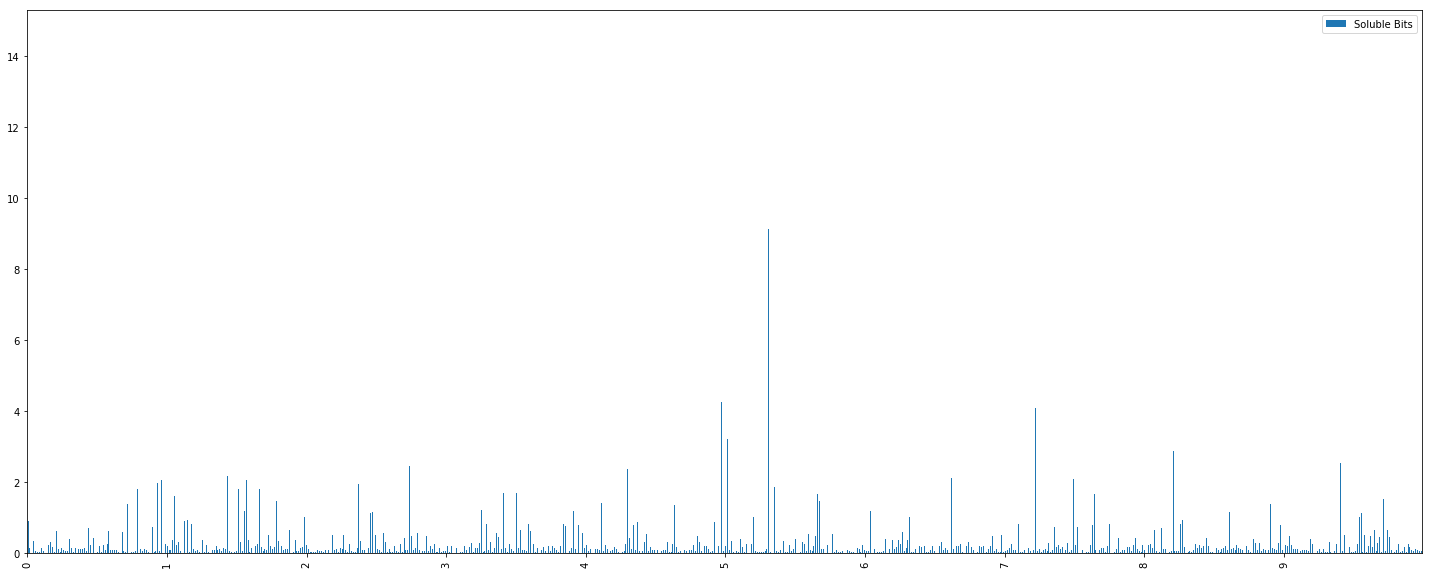

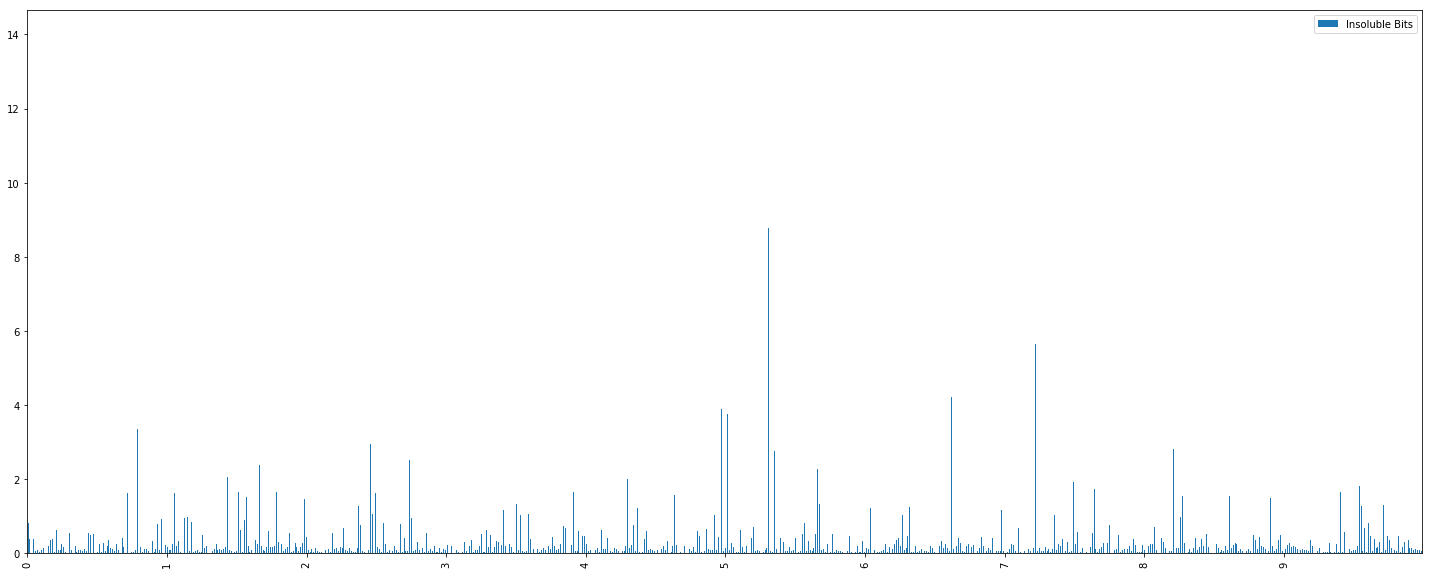

In [7]:
df_sol_norm.plot.bar(figsize=(25,10), label='Soluble')
plt.locator_params(axis='x', nbins=10)
df_insol_norm.plot.bar(figsize=(25,10), label='Inoluble')
plt.locator_params(axis='x', nbins=10)
plt.plot()

[]

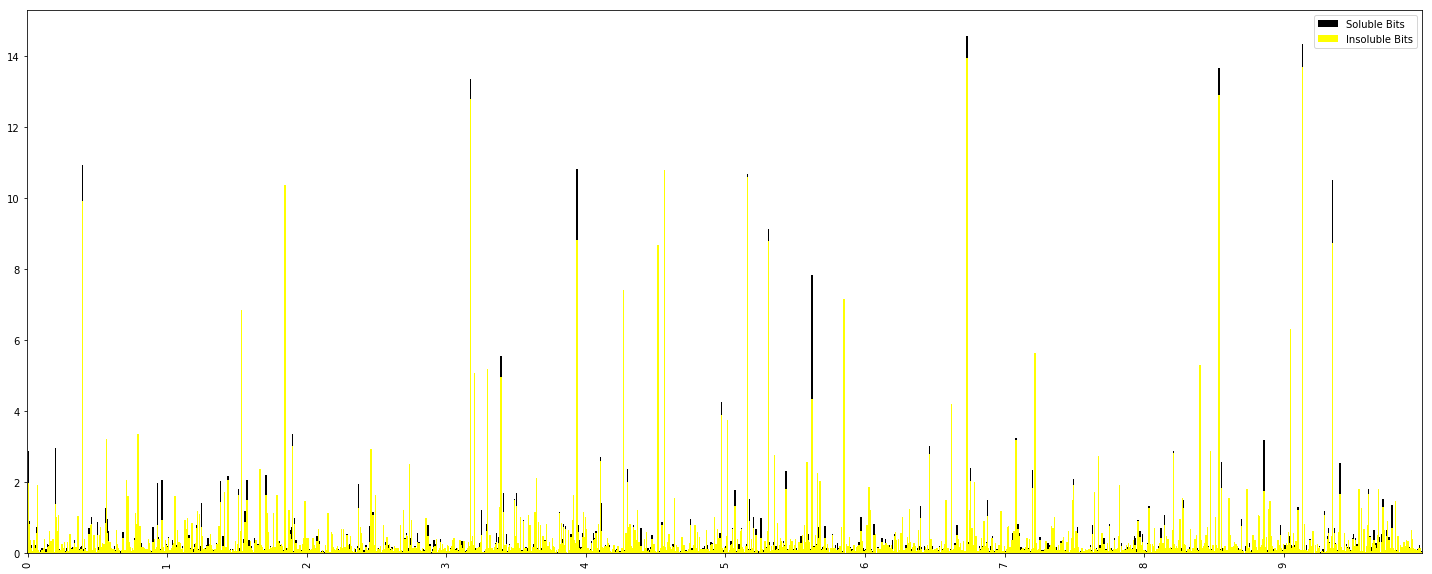

In [6]:
l = df_sol_norm.plot.bar(figsize=(25,10), stacked=True, label='Soluble', width=2, color='black', align='center')
df_insol_norm.plot.bar(label='Insoluble', color = 'yellow',ax=l, width=2, align='center')
plt.locator_params(axis='x', nbins=10)
plt.plot()

In [28]:
# Definitely an appreciable difference!
# This might just be to noise though

# For funsies lets see if it's more pronounced with other sets
# First set
df = pickle.load(open(morg_1024_bit, 'rb'))

# Tuple to save space/make counting eaiser
df['Solubility'] = df['Solubility'].apply(tuple)
df['fingerprints'] = df['fingerprints'].apply(tuple)

active_bits_sol= [0 for i in range(1024)]
active_bits_insol= [0 for i in range(1024)]

# soluble active bits
for c, item in enumerate(df['fingerprints']):
    if df['Solubility'][c] == (0,1):
        active_bits = [index for index, bit in enumerate(item) if bit == 1]
        for item in active_bits: active_bits_sol[item] +=1

#insoluble active bits
for c, item in enumerate(df['fingerprints']):
    if df['Solubility'][c] == (1,0):
        active_bits = [index for index, bit in enumerate(item) if bit == 1]
        for item in active_bits: active_bits_insol[item] +=1
df_sol = pd.DataFrame(data = active_bits_sol, columns = ['Soluble Bits'])
df_insol = pd.DataFrame(data = active_bits_insol, columns = ['Insoluble Bits'])


# Normalize and remove negitive values to make it eaiser to see patterns
df_sol_norm = df_sol.apply(zscore)
df_insol_norm = df_insol.apply(zscore)
df_sol_norm = df_sol.apply(zscore) + abs(min(df_sol_norm['Soluble Bits']))
df_insol_norm = df_insol.apply(zscore) + abs(min(df_insol_norm['Insoluble Bits']))


[]

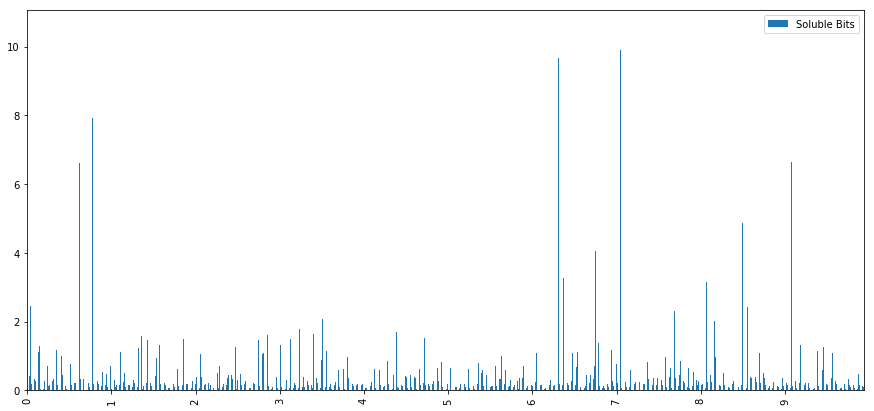

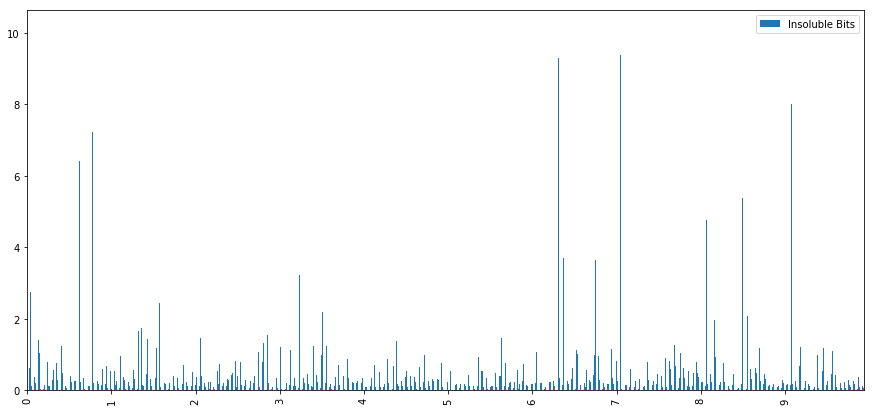

In [24]:
df_sol_norm.plot(kind='bar', figsize=(15,7), label='Soluble')
plt.locator_params(axis='x', nbins=10)
df_insol_norm.plot(kind='bar', figsize=(15,7), label='Inoluble')
plt.locator_params(axis='x', nbins=10)
plt.plot()

[]

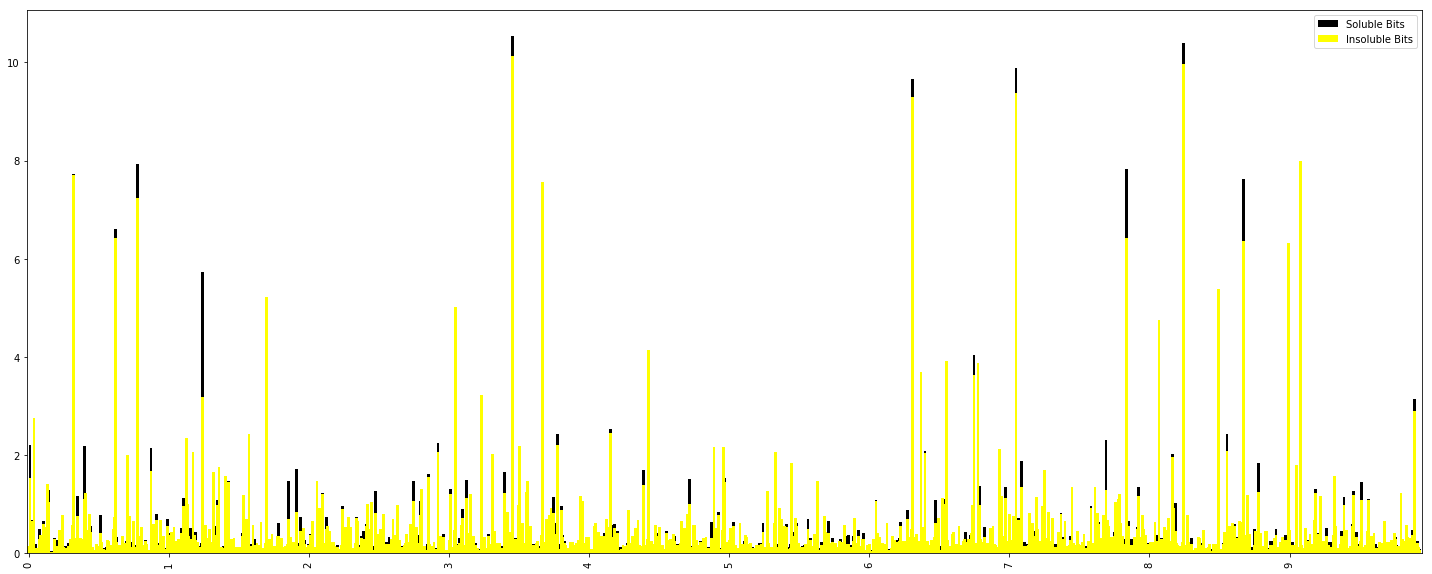

In [29]:
l = df_sol_norm.plot.bar(figsize=(25,10), stacked=True, label='Soluble', width=2, color='black', align='center')
df_insol_norm.plot.bar(label='Insoluble', color = 'yellow',ax=l, width=2, align='center')
plt.locator_params(axis='x', nbins=10)
plt.plot()

In [30]:
# Definitely an appreciable difference!
# This might just be to noise though

# For funsies lets see if it's more pronounced with other sets
# First set
df = pickle.load(open(maccs, 'rb'))

# Tuple to save space/make counting eaiser
df['Solubility'] = df['Solubility'].apply(tuple)
df['fingerprints'] = df['fingerprints'].apply(tuple)

active_bits_sol= [0 for i in range(167)]
active_bits_insol= [0 for i in range(167)]

# soluble active bits
for c, item in enumerate(df['fingerprints']):
    if df['Solubility'][c] == (0,1):
        active_bits = [index for index, bit in enumerate(item) if bit == 1]
        for item in active_bits: active_bits_sol[item] +=1

#insoluble active bits
for c, item in enumerate(df['fingerprints']):
    if df['Solubility'][c] == (1,0):
        active_bits = [index for index, bit in enumerate(item) if bit == 1]
        for item in active_bits: active_bits_insol[item] +=1
            
df_sol = pd.DataFrame(data = active_bits_sol, columns = ['Soluble Bits'])
df_insol = pd.DataFrame(data = active_bits_insol, columns = ['Insoluble Bits'])


# Normalize and remove negitive values to make it eaiser to see patterns
df_sol_norm = df_sol.apply(zscore)
df_insol_norm = df_insol.apply(zscore)
df_sol_norm = df_sol.apply(zscore) + abs(min(df_sol_norm['Soluble Bits']))
df_insol_norm = df_insol.apply(zscore) + abs(min(df_insol_norm['Insoluble Bits']))


[]

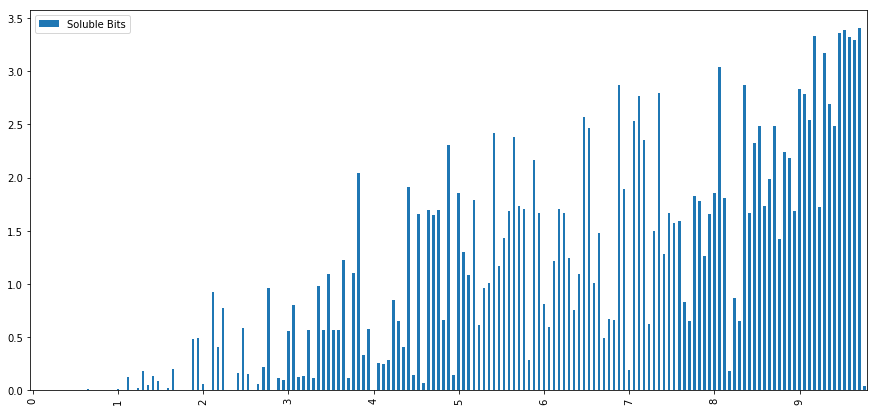

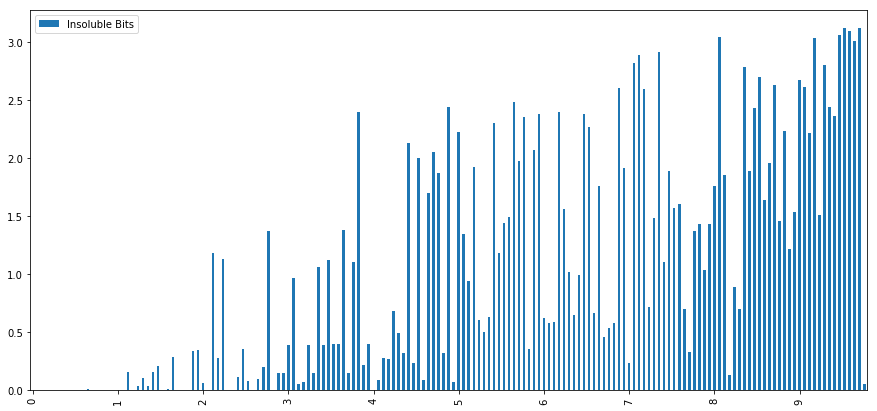

In [26]:
df_sol_norm.plot(kind='bar', figsize=(15,7), label='Soluble')
plt.locator_params(axis='x', nbins=10)
df_insol_norm.plot(kind='bar', figsize=(15,7), label='Inoluble')
plt.locator_params(axis='x', nbins=10)
plt.plot()

[]

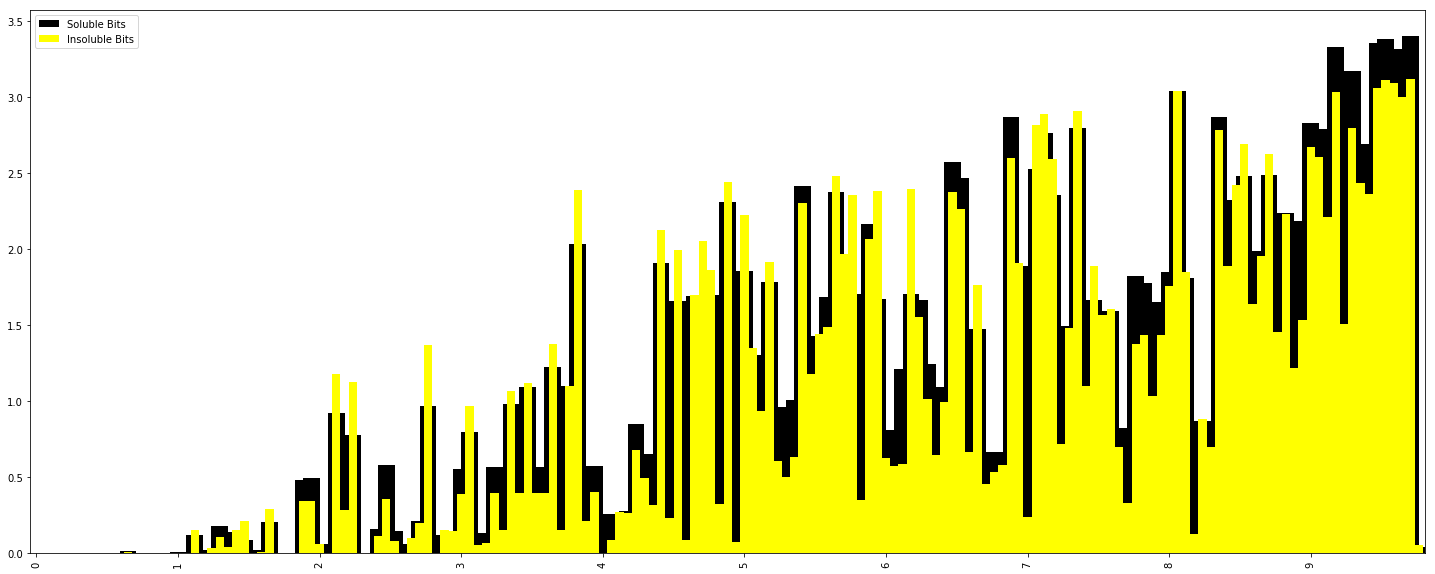

In [32]:
l = df_sol_norm.plot.bar(figsize=(25,10), stacked=True, label='Soluble', width=2, color='black', align='center')
df_insol_norm.plot.bar(label='Insoluble', color = 'yellow',ax=l, width=1, align='center')
plt.locator_params(axis='x', nbins=10)
plt.plot()

In [57]:
# Interesting. Looks like morgan fingerprints with more bits is the most useful fingerprint